# Esercitazione 4a settimana - Fisica Computazionale

## **Dinamica del punto materiale: piano inclinato, attrito, moto 2D in presenza di forze**

## **Esercizio 1. Piano inclinato**

Il varo è il momento in cui una nave [viene fatta entrare in acqua](https://i.pinimg.com/originals/78/a6/ce/78a6ce6caae8b01c667a6ebae110a3a5.gif). In alcuni casi, la nave viene costruita su una rampa inclinata, e lasciata scivolare in mare a lavori ultimati.

Considera:
- una nave di massa pari a $10^4$ tonnellate,
- su una rampa lunga $100\ m$,
- con coefficiente di attrito statico $\mu_s=0.1$ (l'attrito viene ridotto lubrificando la rampa).

1) quale deve essere l'angolo minimo della rampa in modo che la nave possa scivolare in acqua?

2) Per evitare la formazione di onde violente nel porto, si stima che la velocità di ingresso in acqua della nave non debba superare i 15 m/s. Qual è quindi l'angolo massimo della rampa perché questa condizione sia rispettata?

Calcola i risultati in assenza e in presenza di attrito dinamico ($\mu_d=0.7$).

## Soluzione analitica

Dato un corpo a contatto con una superficie, la forza di attrito statico rappresenta la forza che deve essere applicata al corpo, in direzione parallela alla superficie, per metterlo in moto. E' data da:
$$F_{as}=\mu_s F_\perp$$
dove la forza premente $F_\perp$ è la componente della forza totale applicata al corpo perpendicolare alla superficie. 

Per risolvere il punto 1) dobbiamo quindi chiederci per quale angolo $\theta_\mathrm{min}$ la forza che agisce sulla nave in direzione parallela al piano inclinato diventi maggiore di $F_{as}$:
$$F_{\parallel}>F_{a, s}$$
$$mg\sin\theta>\mu_s mg\cos\theta$$
$$\theta > \arctg \mu$$
$$\Rightarrow \theta_\mathrm{min} = \arctg 0.1 \approx 5.7°$$

Una volta che la nave comincia a scivolare, possiamo determinare la sua accelerazione con la seconda legge di Newton:
$$a=\frac{F}{m}=g\sin\theta$$
in assenza di attrito (che cosa cambia considerando l'attrito dinamico?).

Ricaviamo il tempo che trascorre prima che entri in acqua imponendo:
$$\frac{1}{2}g\sin\theta\ t_{aq}^2=100\quad \Rightarrow \quad  t_{aq} = \sqrt{\frac{2\cdot 100}{g\sin\theta}}$$

Infine, otteniamo qual è l'angolo massimo (2) per cui la velocità al tempo $t_{aq}$ è inferiore a 10 m/s:
$$at_{aq}<15 \quad \Rightarrow \quad g\sin\theta\sqrt{\frac{2\cdot 100}{g\sin\theta}}<15$$
$$\theta <\theta_{MAX} = \arcsin \frac{15^2}{{2\cdot 100 \cdot 9.81}}\approx 6.59°$$



## Soluzione numerica: **il metodo di bisezione**

Il metodo di bisezione ci permette di trovare, sotto alcune condizioni, lo zero di una funzione, cioè il valore per cui una funzione si annulla: è quindi molto utile quando le equazioni non sono risolvibili analiticamente.

## Esempio

0 10
0 5.0
0 2.5
1.25 2.5
1.875 2.5
1.875 2.1875
1.875 2.03125
1.953125 2.03125
1.9921875 2.03125
1.9921875 2.01171875
1.9921875 2.001953125
1.9970703125 2.001953125
1.99951171875 2.001953125
1.99951171875 2.000732421875


(0.0, 10.0)

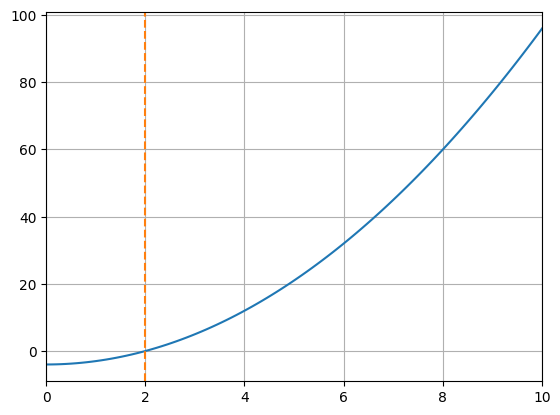

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def algoritmo_bisezione(f, x1, x2, risoluzione=0.001):    # f è una funzione!
    # alcune accortezze
    if x2 <= x1:
        print('x2 must be greater than x1')
        return
    elif f(x1)*f(x2) >= 0:
        print('f(x1) and f(x2) must have opposite signs')
        return
    else:
        xm = (x1+x2)/2
        while x2-x1 > risoluzione:
            print(x1,x2)            # scommenta per stampare le varie iterazioni
            xm = (x1+x2)/2
            if f(xm)*f(x1) >= 0:
                x1 = xm
            else:
                x2 = xm
        return xm

# esempio
def parabola(x):
    return x**2-4

x1, x2 = 0, 10
xs = np.linspace(x1, x2, 100)
plt.plot(xs, parabola(xs))
plt.axvline(x=algoritmo_bisezione(parabola, x1, x2), ls='--', color='tab:orange')
plt.grid()
plt.xlim(x1, x2)



Immaginiamo di voler risolvere il punto 2. dell'esercizio del piano inclinato. Vogliamo cioè trovare l'angolo $\theta_{MAX}$, quello per cui la velocità di ingresso in acqua è esattamente uguale al valore critico di 10 m/s. Vogliamo cioè risolvere l'equazione (vedi sopra):

$$\sqrt{g\cdot\sin x\cdot{2\cdot 100}}=15\quad(*)$$ 

Per usare l'algoritmo di bisezione dobbiamo però definire la funzione di cui vogliamo trovare lo *zero*! Definiamo allora $f(x)$ come:
$$f(x) \equiv \sqrt{9.81\cdot\sin x\cdot{2\cdot 100}}-15$$
in questo modo trovare il valore per cui $f(x)=0$ equivale a trovare una soluzione per l'equazione (*).

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Dati
m = 10**4 * 1000
l = 100
mu_s = 0.2
mu_d = 0.1

# definiamo la funzione di cui vogliamo trovare lo zero
def f(x):
    return np.sqrt(9.81*200*np.sin(x))-15

theta_rad = algoritmo_bisezione(f,0,np.pi/4, risoluzione=0.001)
theta_gradi = theta_rad * 180 / np.pi
print('L\'angolo massimo è uguale a %.3f rad = %.2f°.' % (theta_rad, theta_gradi))

0 0.7853981633974483
0 0.39269908169872414
0 0.19634954084936207
0.09817477042468103 0.19634954084936207
0.09817477042468103 0.14726215563702155
0.09817477042468103 0.1227184630308513
0.11044661672776616 0.1227184630308513
0.11044661672776616 0.11658253987930872
0.11351457830353745 0.11658253987930872
0.11351457830353745 0.11504855909142309
L'angolo massimo è uguale a 0.114 rad = 6.55°.


## **Esercizio 2. Moto rettilineo di un corpo con massa variabile**

Tratto da "Physics for Scientists and Engineers", 6th Edition, esercizio 11 cap. 5:

_Suppose a truck loaded with sand accelerates along a highway. If the driving force on the truck remains constant, what happens to the truck’s acceleration if its trailer leaks sand at a constant rate through a hole in its bottom?_

Sapendo che:
- il camion da vuoto pesa 10 tonnellate e sta trasportando 20 tonnellate di sabbia, 
- il camion perde $3\ m^3$ di sabbia ogni minuto,
- il camion accelera, da una velocità iniziale di $50\ km/h$ ad una finale di $140\ km/h$ (quando l'autista si accorge che c'è un problema) esercitando una forza di $5\ kN$, 
- la sabbia ha una densità di $\rho=1.5\ ton/m^3$.

Trova:
- la distanza percorsa tra istante iniziale e finale,
- il tempo trascorso,
- la sabbia persa lungo la strada.

**Risolvere matematicamente questo problema non è banale** perché l'accelerazione non è costante! Trova quindi una soluzione numerica con il metodo di Eulero.

**Ricorda che:** per trovare l'accelerazione puoi sempre usare la legge di Newton: $\quad F=ma$

Distanza percorsa: 15130 m.
Tempo trascorso: 620 s.
Quantità di sabbia persa lungo la strada: 20002 kg.


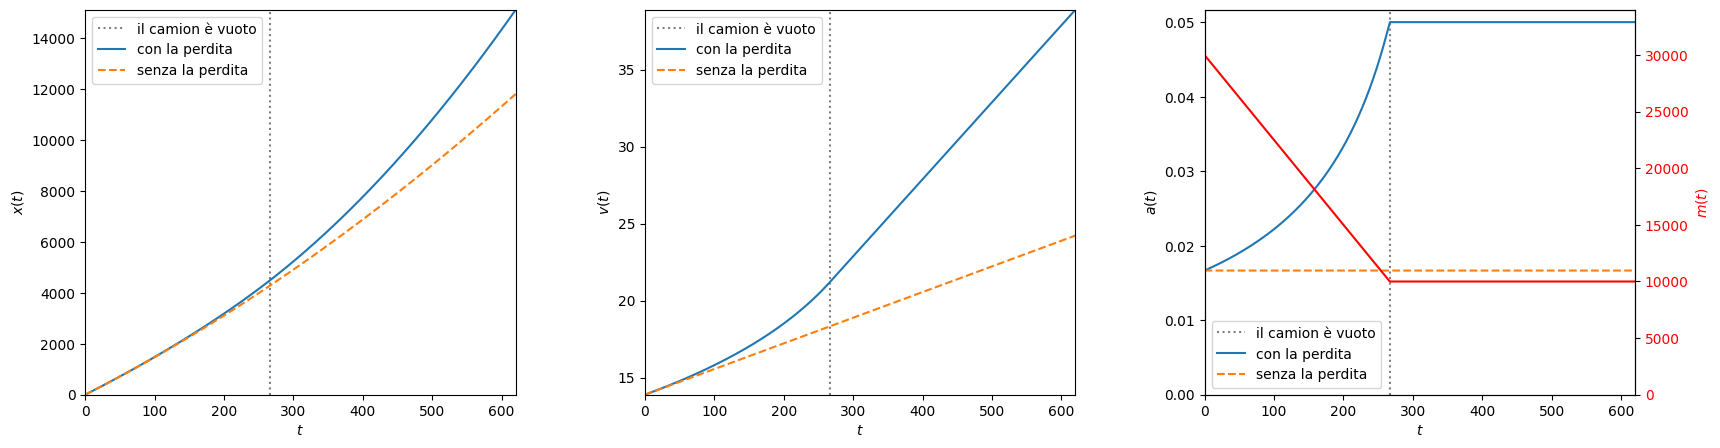

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Dati (convertiti in unità SI)
massa_camion = 10E3         # [kg] --> 1 ton = 10^3 kg
massa_sabbia = 20E3
massa_totale = massa_camion + massa_sabbia

v_i = 50 * 1000 / 3600      # [m/s]
v_f = 140 * 1000 / 3600 

forza = 500                # [N]
flusso_perdita = 3. / 60    # [m^3/s]
densita_sabbia = 1.5E3      # [kg/m^3]

# durata intervallo temporale
dt = 0.1

# Definiamo le liste che ci servono: stavolta anche l'accelerazione cambia con il tempo!
ts = [0]
xs = [0]
vels = [v_i]
accs = [forza/massa_totale]     # F=ma
mass = [massa_totale]           # ci fa comodo avere una lista anche per la massa   
t_vuoto = 0                     # il momento in cui il cassone si svuota

# Metodo di Eulero:
while vels[-1] < v_f:
    # Calcoliamo quanta sabbia è stata persa per strada
    if mass[-1] > massa_camion:     # cioè se il cassone non si è svuotato del tutto
        volume_sabbia_persa = flusso_perdita * dt
        massa_sabbia_persa = volume_sabbia_persa * densita_sabbia
        mass[-1] = mass[-1] - massa_sabbia_persa
        t_vuoto = ts[-1]
    mass.append(mass[-1])

    # aggiorniamo la velocità
    a = accs[-1]
    v = vels[-1] + a*dt
    # aggiorniamo la posizione
    x = xs[-1] + v*dt
    # calcoliamo la nuova accelerazione usando F=ma
    a = forza / mass[-1]

    # Memorizziamo i risultati
    ts.append(ts[-1] + dt)
    xs.append(x)
    vels.append(v)
    accs.append(a)


### GRAFICI ###
# prepariamo 3 sottografici
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=.3)

# aggiungo una linea verticale per segnare il momento in cui finisce la sabbia
for i in range(3):
    axs[i].axvline(x=t_vuoto, ls=':', color='gray', label='il camion è vuoto')

# grafico posizione
axs[0].plot(ts, xs, label='con la perdita')
axs[0].plot(ts, xs[0] + v_i*np.array(ts) + .5*accs[0]*np.array(ts)**2, '--', label='senza la perdita')
axs[0].set_xlim(min(ts), max(ts))
axs[0].set_ylim(min(xs), max(xs))
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$x(t)$')
axs[0].legend()

# grafico velocità
axs[1].plot(ts,vels, label='con la perdita')
axs[1].plot(ts, np.array(v_i) + accs[0]*np.array(ts), '--', label='senza la perdita')
axs[1].set_xlim(min(ts), max(ts))
axs[1].set_ylim(min(vels), max(vels))
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$v(t)$')
axs[1].legend()

# grafico accelerazione
axs[2].plot(ts,accs, label='con la perdita')
axs[2].plot(ts, forza/massa_totale*np.ones(len(ts)), '--', label='senza la perdita')
axs[2].set_xlim(min(ts), max(ts))
axs[2].set_ylim(bottom=0)
axs[2].set_xlabel('$t$')
axs[2].set_ylabel('$a(t)$')
# aggiungiamo un secondo asse y per la massa
ax2 = axs[2].twinx() 
ax2.plot(ts, mass, 'r-')  
ax2.set_ylabel('$m(t)$', color='r')  
ax2.tick_params(axis='y', labelcolor='r') 
ax2.set_ylim(bottom=0, top=34000)
axs[2].legend(loc=3)


print(f'Distanza percorsa: {xs[-1]:.0f} m.')
print(f'Tempo trascorso: {ts[-1]:.0f} s.')
print(f'Quantità di sabbia persa lungo la strada: {massa_totale-mass[-1]:.0f} kg.')
